# PHYS465: advanced plotting and pandas tips

Python is an extremely adaptable coding resource. One of it's strengths is the libraries that have been developed by the wider community. 

These packages include  Numerical Python `numpy` and Scientific Python `scipy` as well as plotting packages such as `matplotlib`. `matplotlib` in particular has a large variety of options enabling us to produce publication ready plots. 

Last week we introduced `pandas`. This is one of the key libraries for data analysis. Here we will go through some of the many options

***

## Get started - `matplotlib`

Before doing anything in `jupyter`, we run a magic command to make the plots appear inside our notebook

In [1]:
# matplotlib inline plotting
%matplotlib inline

# There's also a backend should we want to interact with our plots.
#%matplotlib widget

## Getting started: module import and general settings


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
# 
# Set the default size and fonts
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

## a test dataset
 * Data on power generation data
 * This data comes from Red Eléctrica, retrieved from the public [REData API] (https://www.ree.es/es/apidatos).
 * The data can be found here: `https://raw.githubusercontent.com/MatSmithAstro/phys465_resources/main/workshops/week12/datasets/power_sources_daily_2014_2023.csv`


In [3]:
df_daily = pd.read_csv('https://raw.githubusercontent.com/MatSmithAstro/phys465_resources/main/workshops/week12/datasets/power_sources_daily_2014_2023.csv', index_col=0)
df_daily.head(5)

,Hydro,PumpedStorage,Nuclear,Coal,FuelGas,DieselEngines,GasTurbine,SteamTurbine,CombinedCycle,Hydroeolian,...,SolarPhotovoltaic,ThermalSolar,OtherRenewables,Cogeneration,NonRenewableWaste,RenewableWaste,TotalGeneration,year,month,day
2014-01-01,73065.052,6970.160,146015.503,25240.655,-4.599,8388.976,1481.931,6117.065,53534.600,NaN,...,7631.801,519.532,11897.240,54043.077,4616.7525,1877.3425,659291.293,2014,1,1
2014-01-02,89171.545,23682.079,146147.546,37546.113,-4.825,8659.002,2325.496,7586.721,52322.227,NaN,...,3836.442,177.784,11564.649,79006.632,4743.0875,1831.7535,739360.656,2014,1,2
2014-01-03,102502.527,23882.275,146198.074,42672.054,-4.767,8734.932,2196.861,8043.085,51254.562,NaN,...,8673.179,1157.242,11891.476,85658.228,4657.5170,1599.8520,747939.175,2014,1,3
2014-01-04,106840.706,8520.894,146270.916,30782.043,-4.626,8427.393,1620.337,6875.346,32862.777,NaN,...,8813.196,478.934,12103.260,65312.961,4375.2160,1519.4580,749876.430,2014,1,4
2014-01-05,117217.635,17345.744,121525.188,24606.925,-4.795,8346.540,1564.459,6511.197,41422.898,NaN,...,10878.603,2137.221,11775.113,64800.182,4462.8175,1729.6255,694993.941,2014,1,5


### `pandas`: indices

In [4]:
df_daily.index

Index(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04', '2014-01-05',
       '2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09', '2014-01-10',
       ...
       '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25', '2023-12-26',
       '2023-12-27', '2023-12-28', '2023-12-29', '2023-12-30', '2023-12-31'],
      dtype='object', length=3652)

In [5]:
df_daily.set_index('TotalGeneration').iloc[0:4]

,Hydro,PumpedStorage,Nuclear,Coal,FuelGas,DieselEngines,GasTurbine,SteamTurbine,CombinedCycle,Hydroeolian,Wind,SolarPhotovoltaic,ThermalSolar,OtherRenewables,Cogeneration,NonRenewableWaste,RenewableWaste,year,month,day
TotalGeneration,,,,,,,,,,,,,,,,,,,,
659291.293,73065.052,6970.160,146015.503,25240.655,-4.599,8388.976,1481.931,6117.065,53534.600,NaN,257896.205,7631.801,519.532,11897.240,54043.077,4616.7525,1877.3425,2014,1,1
739360.656,89171.545,23682.079,146147.546,37546.113,-4.825,8659.002,2325.496,7586.721,52322.227,NaN,270764.404,3836.442,177.784,11564.649,79006.632,4743.0875,1831.7535,2014,1,2
747939.175,102502.527,23882.275,146198.074,42672.054,-4.767,8734.932,2196.861,8043.085,51254.562,NaN,248822.078,8673.179,1157.242,11891.476,85658.228,4657.5170,1599.8520,2014,1,3
749876.430,106840.706,8520.894,146270.916,30782.043,-4.626,8427.393,1620.337,6875.346,32862.777,NaN,315077.619,8813.196,478.934,12103.260,65312.961,4375.2160,1519.4580,2014,1,4


### `pandas`: columns
 * what information is available?

In [6]:
df_daily.columns

Index(['Hydro', 'PumpedStorage', 'Nuclear', 'Coal', 'FuelGas', 'DieselEngines',
       'GasTurbine', 'SteamTurbine', 'CombinedCycle', 'Hydroeolian', 'Wind',
       'SolarPhotovoltaic', 'ThermalSolar', 'OtherRenewables', 'Cogeneration',
       'NonRenewableWaste', 'RenewableWaste', 'TotalGeneration', 'year',
       'month', 'day'],
      dtype='object')

In [7]:
df_daily.rename(columns={'DieselEngines':'Diesel'}).head(5)
# NB : df's are only updated if `in_place=True` or listed as an output 

,Hydro,PumpedStorage,Nuclear,Coal,FuelGas,Diesel,GasTurbine,SteamTurbine,CombinedCycle,Hydroeolian,...,SolarPhotovoltaic,ThermalSolar,OtherRenewables,Cogeneration,NonRenewableWaste,RenewableWaste,TotalGeneration,year,month,day
2014-01-01,73065.052,6970.160,146015.503,25240.655,-4.599,8388.976,1481.931,6117.065,53534.600,NaN,...,7631.801,519.532,11897.240,54043.077,4616.7525,1877.3425,659291.293,2014,1,1
2014-01-02,89171.545,23682.079,146147.546,37546.113,-4.825,8659.002,2325.496,7586.721,52322.227,NaN,...,3836.442,177.784,11564.649,79006.632,4743.0875,1831.7535,739360.656,2014,1,2
2014-01-03,102502.527,23882.275,146198.074,42672.054,-4.767,8734.932,2196.861,8043.085,51254.562,NaN,...,8673.179,1157.242,11891.476,85658.228,4657.5170,1599.8520,747939.175,2014,1,3
2014-01-04,106840.706,8520.894,146270.916,30782.043,-4.626,8427.393,1620.337,6875.346,32862.777,NaN,...,8813.196,478.934,12103.260,65312.961,4375.2160,1519.4580,749876.430,2014,1,4
2014-01-05,117217.635,17345.744,121525.188,24606.925,-4.795,8346.540,1564.459,6511.197,41422.898,NaN,...,10878.603,2137.221,11775.113,64800.182,4462.8175,1729.6255,694993.941,2014,1,5


### `pandas`: slicing, selecting and masking
 * Either by:
    * `.loc` : the rows by index
    * `.iloc`: the rows by order
    * `[column]`: by column
    * NB: multiple selections must be separated by parenthesis
    * NB: multiple selections use `&`, `|` and `~`

In [8]:
df_daily.loc[(df_daily['year']==2023) & (df_daily['month']==1), ['day','TotalGeneration']].iloc[0:4]

,day,TotalGeneration
2023-01-01,1,555113.363
2023-01-02,2,667878.262
2023-01-03,3,704898.650
2023-01-04,4,668345.832


In [9]:
mask = (df_daily['year']==2014) & (df_daily['month']==6)
mask.head(5)

2014-01-01    False
2014-01-02    False
2014-01-03    False
2014-01-04    False
2014-01-05    False
dtype: bool

In [10]:
df_daily[mask].head(5)

,Hydro,PumpedStorage,Nuclear,Coal,FuelGas,DieselEngines,GasTurbine,SteamTurbine,CombinedCycle,Hydroeolian,...,SolarPhotovoltaic,ThermalSolar,OtherRenewables,Cogeneration,NonRenewableWaste,RenewableWaste,TotalGeneration,year,month,day
2014-06-01,65389.471,7878.267,121641.403,79070.330,-2.256,7503.764,1776.386,4057.773,51864.996,NaN,...,27412.276,22702.250,10622.548,58300.431,5654.2275,1921.0105,602717.980,2014,6,1
2014-06-02,95546.704,8177.104,121578.665,154744.327,-2.125,8035.865,2583.155,4970.044,65651.959,NaN,...,33409.279,27120.289,11686.163,71491.948,5602.6750,1811.4260,695535.956,2014,6,2
2014-06-03,95339.932,6452.355,121539.032,161003.856,-1.579,8757.074,3018.897,5006.745,79689.257,NaN,...,34161.649,29969.868,11632.312,71364.903,5481.6655,1845.3955,705849.678,2014,6,3
2014-06-04,87557.750,7222.694,121321.908,154213.364,-1.646,9047.599,2802.013,5536.351,62733.682,NaN,...,32783.267,31595.413,11345.570,72057.006,5504.8790,1896.0900,721710.824,2014,6,4
2014-06-05,86204.672,8830.243,121334.770,167977.223,-1.537,9329.625,2540.974,6109.765,66661.529,NaN,...,30581.848,22640.648,11876.020,72996.143,5677.0280,1884.4960,726366.190,2014,6,5


### `pandas`: easy statistics
  * `.count()`
  * `.mean()`
  * `.median()`
  * `.sum()`

In [11]:
df_daily['Coal'].sum()

249777702.06700003

### `pandas`: adding and manipuating columns
 * calculate new variables, add them to our dataset

In [12]:
df_daily.loc[:,'Waste'] = df_daily['NonRenewableWaste']+df_daily['RenewableWaste']
df_daily.head(3)

,Hydro,PumpedStorage,Nuclear,Coal,FuelGas,DieselEngines,GasTurbine,SteamTurbine,CombinedCycle,Hydroeolian,...,ThermalSolar,OtherRenewables,Cogeneration,NonRenewableWaste,RenewableWaste,TotalGeneration,year,month,day,Waste
2014-01-01,73065.052,6970.160,146015.503,25240.655,-4.599,8388.976,1481.931,6117.065,53534.600,NaN,...,519.532,11897.240,54043.077,4616.7525,1877.3425,659291.293,2014,1,1,6494.095
2014-01-02,89171.545,23682.079,146147.546,37546.113,-4.825,8659.002,2325.496,7586.721,52322.227,NaN,...,177.784,11564.649,79006.632,4743.0875,1831.7535,739360.656,2014,1,2,6574.841
2014-01-03,102502.527,23882.275,146198.074,42672.054,-4.767,8734.932,2196.861,8043.085,51254.562,NaN,...,1157.242,11891.476,85658.228,4657.5170,1599.8520,747939.175,2014,1,3,6257.369


### `pandas`: combining rows (or binning)
 * combine multiple entries into 1

In [13]:
df_monthly = df_daily.groupby(['year', 'month'], as_index=False).sum().drop('day', axis=1)
df_monthly.head(5)

,year,month,Hydro,PumpedStorage,Nuclear,Coal,FuelGas,DieselEngines,GasTurbine,SteamTurbine,...,Hydroeolian,Wind,SolarPhotovoltaic,ThermalSolar,OtherRenewables,Cogeneration,NonRenewableWaste,RenewableWaste,TotalGeneration,Waste
0,2014,1,4261392.824,443678.644,4526062.779,2293159.522,-148.739,275357.985,54877.485,216697.507,...,0.0,6570961.682,377518.728,79800.655,380895.587,2550462.421,143220.5220,49339.6480,2.403327e+07,192560.170
1,2014,2,5763251.167,369221.991,4721937.495,884091.427,-134.753,253341.742,57405.486,176742.116,...,0.0,5917525.957,434383.400,103264.502,293997.433,1876056.059,122564.6445,35868.0395,2.253211e+07,158432.684
2,2014,3,5293018.012,354775.253,5286792.276,1294242.753,-140.900,255615.002,62648.045,150180.230,...,0.0,5096447.600,735970.624,385175.316,305878.249,1831179.497,112142.4080,32435.4660,2.279159e+07,144577.874
3,2014,4,4986856.873,361188.617,5056306.647,1385564.216,-107.327,239877.290,65461.729,152334.800,...,0.0,3978164.753,791985.906,435527.059,266467.509,1618663.435,137938.5380,51170.3200,2.103158e+07,189108.858
4,2014,5,2826765.233,275956.466,4336633.309,3367749.593,-109.851,257606.270,71625.317,145996.242,...,0.0,4177875.518,924515.196,729935.555,330192.006,1931174.991,162033.5560,60551.0040,2.131005e+07,222584.560


### `pandas` : splitting over a list
Given a set of columns we can split the dataframe and determine statistics

In [14]:
renewable = [
    'Hydro',
    'Hydroeolian',
    'Wind',
    'SolarPhotovoltaic',
    'ThermalSolar',
    'OtherRenewables',
    'RenewableWaste'
]

In [15]:
df_monthly['renewable_total'] = df_monthly.loc[:, renewable].sum(axis=1)
df_monthly.head()

,year,month,Hydro,PumpedStorage,Nuclear,Coal,FuelGas,DieselEngines,GasTurbine,SteamTurbine,...,Wind,SolarPhotovoltaic,ThermalSolar,OtherRenewables,Cogeneration,NonRenewableWaste,RenewableWaste,TotalGeneration,Waste,renewable_total
0,2014,1,4261392.824,443678.644,4526062.779,2293159.522,-148.739,275357.985,54877.485,216697.507,...,6570961.682,377518.728,79800.655,380895.587,2550462.421,143220.5220,49339.6480,2.403327e+07,192560.170,1.171991e+07
1,2014,2,5763251.167,369221.991,4721937.495,884091.427,-134.753,253341.742,57405.486,176742.116,...,5917525.957,434383.400,103264.502,293997.433,1876056.059,122564.6445,35868.0395,2.253211e+07,158432.684,1.254829e+07
2,2014,3,5293018.012,354775.253,5286792.276,1294242.753,-140.900,255615.002,62648.045,150180.230,...,5096447.600,735970.624,385175.316,305878.249,1831179.497,112142.4080,32435.4660,2.279159e+07,144577.874,1.184893e+07
3,2014,4,4986856.873,361188.617,5056306.647,1385564.216,-107.327,239877.290,65461.729,152334.800,...,3978164.753,791985.906,435527.059,266467.509,1618663.435,137938.5380,51170.3200,2.103158e+07,189108.858,1.051017e+07
4,2014,5,2826765.233,275956.466,4336633.309,3367749.593,-109.851,257606.270,71625.317,145996.242,...,4177875.518,924515.196,729935.555,330192.006,1931174.991,162033.5560,60551.0040,2.131005e+07,222584.560,9.049835e+06


### `pandas`: applying functions
With pandas we can apply complex functions inside the dataframe and store them

In [16]:
def my_func(x,y, A=2):
    return x*A + y

In [17]:
df_monthly.apply(lambda x: my_func(x.Waste,x.RenewableWaste,A=7), axis=1)

0      1.397261e+06
1      1.144897e+06
2      1.044481e+06
3      1.374932e+06
4      1.618643e+06
           ...     
115    1.455067e+06
116    1.403758e+06
117    1.448739e+06
118    1.210036e+06
119    1.380846e+06
Length: 120, dtype: float64

### `pandas`: unique
 * determine all entry types and how many there are

In [18]:
months = df_monthly.month.unique()
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [19]:
df_monthly.month.value_counts()

month
1     10
2     10
3     10
4     10
5     10
6     10
7     10
8     10
9     10
10    10
11    10
12    10
Name: count, dtype: int64

### `pandas`: duplicates and NaN's

In [20]:
df_daily.drop_duplicates(subset = ['month'], keep='first').head(5)

,Hydro,PumpedStorage,Nuclear,Coal,FuelGas,DieselEngines,GasTurbine,SteamTurbine,CombinedCycle,Hydroeolian,...,ThermalSolar,OtherRenewables,Cogeneration,NonRenewableWaste,RenewableWaste,TotalGeneration,year,month,day,Waste
2014-01-01,73065.052,6970.160,146015.503,25240.655,-4.599,8388.976,1481.931,6117.065,53534.600,NaN,...,519.532,11897.240,54043.077,4616.7525,1877.3425,659291.293,2014,1,1,6494.095
2014-02-01,161849.275,8404.084,146035.108,19024.603,-5.158,9420.128,1654.347,6777.778,35667.050,NaN,...,1642.332,10769.767,66972.260,4434.0080,1259.5310,774037.770,2014,2,1,5693.539
2014-03-01,147343.844,15624.792,171049.511,26823.629,-4.766,8510.628,1945.406,5255.607,33296.097,NaN,...,3.768,9119.414,46441.062,4741.4485,1683.7205,756875.569,2014,3,1,6425.169
2014-04-01,157739.698,8014.000,170701.988,44660.179,-4.177,7919.105,1995.139,3920.195,37621.274,NaN,...,1420.625,8131.211,58720.728,3916.5630,1032.9950,784457.776,2014,4,1,4949.558
2014-05-01,99717.674,7339.914,166738.363,49464.169,-3.643,7919.036,1639.541,4319.489,49115.041,NaN,...,28401.631,10270.144,42323.711,4251.6250,2207.4440,586237.520,2014,5,1,6459.069


In [21]:
df_daily = df_daily.dropna()

### `pandas`: merge, join and concantenate
 * There are plenty of options for joining together datasets

In [22]:
df_2023 = df_monthly[df_monthly.year==2023].set_index('month')
df_2022 = df_monthly[df_monthly.year==2022].set_index('month')
df_2023.head(2)

,year,Hydro,PumpedStorage,Nuclear,Coal,FuelGas,DieselEngines,GasTurbine,SteamTurbine,CombinedCycle,...,Wind,SolarPhotovoltaic,ThermalSolar,OtherRenewables,Cogeneration,NonRenewableWaste,RenewableWaste,TotalGeneration,Waste,renewable_total
month,,,,,,,,,,,,,,,,,,,,,
1,2023,3859362.995,542797.450,5086763.589,295484.046,0.0,186632.063,64152.798,118030.389,2708507.873,...,7457302.336,1744409.448,119507.759,291615.695,1210259.549,103404.0280,68128.8380,2.385801e+07,171532.866,1.354198e+07
2,2023,2462733.917,260871.229,4597959.716,407401.986,0.0,195871.718,59331.864,118052.049,4367513.452,...,4676693.516,2151530.691,178785.415,357349.404,1720034.232,115258.8695,71962.4925,2.174218e+07,187221.362,9.899885e+06


In [23]:
df_20222023 = pd.concat([df_2023,df_2022])
df_20222023.year.unique()

array([2023, 2022])

### `pandas`: an aside: multiple indices

In [24]:
df_20222023 = pd.concat([df_2023,df_2022], keys=[2023,2022])
df_20222023.index

MultiIndex([(2023,  1),
            (2023,  2),
            (2023,  3),
            (2023,  4),
            (2023,  5),
            (2023,  6),
            (2023,  7),
            (2023,  8),
            (2023,  9),
            (2023, 10),
            (2023, 11),
            (2023, 12),
            (2022,  1),
            (2022,  2),
            (2022,  3),
            (2022,  4),
            (2022,  5),
            (2022,  6),
            (2022,  7),
            (2022,  8),
            (2022,  9),
            (2022, 10),
            (2022, 11),
            (2022, 12)],
           names=[None, 'month'])

In [25]:
df_20222023.loc[(2023,1)]

year                 2.023000e+03
Hydro                3.859363e+06
PumpedStorage        5.427974e+05
Nuclear              5.086764e+06
Coal                 2.954840e+05
FuelGas              0.000000e+00
DieselEngines        1.866321e+05
GasTurbine           6.415280e+04
SteamTurbine         1.180304e+05
CombinedCycle        2.708508e+06
Hydroeolian          1.649504e+03
Wind                 7.457302e+06
SolarPhotovoltaic    1.744409e+06
ThermalSolar         1.195078e+05
OtherRenewables      2.916157e+05
Cogeneration         1.210260e+06
NonRenewableWaste    1.034040e+05
RenewableWaste       6.812884e+04
TotalGeneration      2.385801e+07
Waste                1.715329e+05
renewable_total      1.354198e+07
Name: (2023, 1), dtype: float64

In [26]:
df_2022_extra = pd.DataFrame(np.transpose(np.random.uniform(size=12)), columns=['cost'], index=np.arange(1,13))
df_2022_extra.loc[:,'the_month'] = df_2022_extra.index
df_2022.loc[:,'the_month'] = df_2022.index

In [27]:
df_2022_extra

,cost,the_month
1,0.404626,1
2,0.350977,2
3,0.659500,3
4,0.162865,4
5,0.614902,5
6,0.428385,6
7,0.828036,7
8,0.554467,8
9,0.170020,9
10,0.082900,10


In [28]:
combo = df_2022.merge(df_2022_extra, how='outer')#,left_on='the_month', right_on='the_month')
combo

,year,Hydro,PumpedStorage,Nuclear,Coal,FuelGas,DieselEngines,GasTurbine,SteamTurbine,CombinedCycle,...,ThermalSolar,OtherRenewables,Cogeneration,NonRenewableWaste,RenewableWaste,TotalGeneration,Waste,renewable_total,the_month,cost
0,2022,2085857.451,215637.741,5048424.951,709963.219,0.0,210125.165,34446.764,117429.802,5898394.445,...,170978.835,428663.218,2147921.609,169946.9290,79365.2920,2.430234e+07,249312.221,9.750045e+06,1,0.404626
1,2022,1174970.170,285079.947,4771058.269,568629.528,0.0,185575.526,34328.002,102630.663,4671261.013,...,208192.368,374913.003,2119152.721,144546.7160,72930.8180,2.112073e+07,217477.534,8.238463e+06,2,0.350977
2,2022,1775478.144,273848.153,4766690.052,705226.125,0.0,207451.405,38861.629,114410.944,3873334.980,...,120568.374,423881.738,2217421.993,183995.6055,82069.2505,2.276972e+07,266064.856,1.038848e+07,3,0.659500
3,2022,1802751.588,336712.619,4414715.447,691004.601,0.0,205100.239,34572.360,103636.366,3146865.903,...,412777.610,430376.969,1709641.202,171926.1160,72848.5770,2.177252e+07,244774.693,1.095835e+07,4,0.162865
4,2022,1923714.557,300017.690,4066355.361,527154.558,0.0,215844.380,42307.777,86849.653,3713639.285,...,621247.495,397336.793,1870740.241,170585.1775,79964.1475,2.205849e+07,250549.325,1.106499e+07,5,0.614902
5,2022,1192915.008,271315.011,4459458.308,833036.370,0.0,224846.990,47734.012,60625.901,6478943.796,...,534217.867,415880.257,1467878.881,155909.4420,76946.9320,2.325692e+07,232856.374,9.257173e+06,6,0.428385
6,2022,1045015.928,216663.274,5073367.597,882232.497,0.0,242769.399,79729.885,73212.087,8460442.205,...,667235.596,409345.595,1056410.114,181020.4545,75732.5205,2.642506e+07,256752.975,1.015921e+07,7,0.828036
7,2022,973565.249,339437.288,5122046.930,819592.534,0.0,245672.779,85532.472,102417.013,8082025.290,...,619958.990,383456.347,776246.574,164797.2165,65488.1505,2.528589e+07,230285.367,9.548125e+06,8,0.554467
8,2022,1154833.141,304785.767,4847367.123,632066.719,0.0,216066.758,84422.616,110953.991,7704899.046,...,437343.279,341441.063,739201.649,140017.9690,59668.6390,2.366621e+07,199686.608,8.886429e+06,9,0.170020
9,2022,719585.021,385629.677,4021338.375,380331.127,0.0,202310.788,79275.334,118598.820,7066690.782,...,166128.813,367411.857,1094108.793,155069.3110,71884.4210,2.195664e+07,226953.732,8.453290e+06,10,0.082900


### `pandas` _many_ more functionalities
- Looping a dataframe (iterrows):

<https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html>

- sort method:

<https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html>

- sample method:

<https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html>

- Reshape dataframes (pivot, stack, unstack):

<http://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/>

- Data cleaning:
    
    - check for missing values (isnull): <https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html>
    - drop missing values (dropna): <https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html>
    - fill the missing values with other values (fillna): <https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html>
    - replace values with different values (replace): <https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html>

- Working with text data: the `str` attribute
    - https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html
- Working with dates
    - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
 
**Search engines (and stack-overflow) is your friend**

### `pandas`: combining multiple techniques

In [29]:
non_renewable = [
    'PumpedStorage',
    'Nuclear',
    'Coal',
    'FuelGas',
    'DieselEngines',
    'GasTurbine',
    'SteamTurbine',
    'CombinedCycle',
    'Cogeneration',
    'NonRenewableWaste'
]

power_labels = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [30]:
year               = 2023
year_mask          = df_monthly.year == year

total_df           = df_monthly.loc[year_mask, renewable + non_renewable].sum(axis=1)
renewable_frac     = 100*df_monthly.loc[year_mask, renewable].sum(axis=1)/total_df
non_renewable_frac = 100*df_monthly.loc[year_mask, non_renewable].sum(axis=1)/total_df
renewable_frac.head()

108    56.760717
109    45.533083
110    52.608556
111    52.064190
112    53.990271
dtype: float64

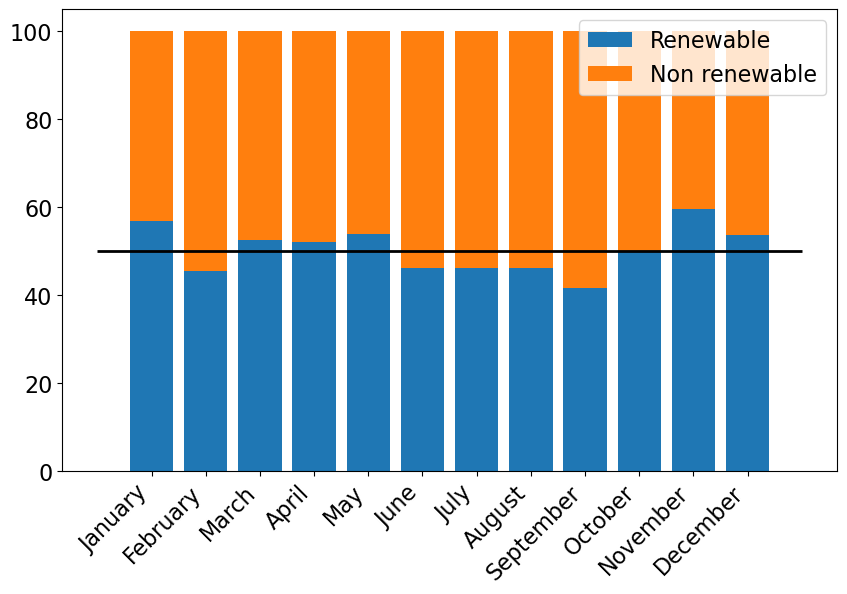

In [31]:
plt.bar(range(1, 13), renewable_frac, label='Renewable')
plt.bar(range(1, 13), non_renewable_frac, bottom=renewable_frac, label='Non renewable')

plt.xticks(range(1, 13), power_labels, rotation=45, ha='right')
plt.hlines(50, 0, 13, colors='k')
plt.legend()

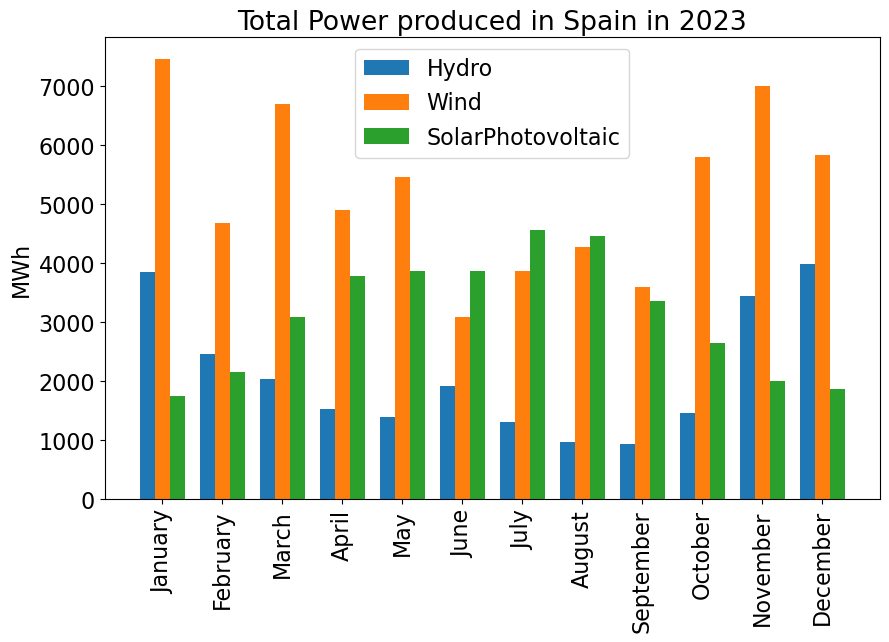

In [32]:
year = 2023
mask_year = df_monthly.year == year
sources_list = ['Hydro', 'Wind', 'SolarPhotovoltaic']
n_sources = len(sources_list)
for ind, source in enumerate(sources_list):
    plt.bar(np.arange(1, 13) + (ind - 1)/(n_sources + 1),
            df_monthly[mask_year][source]/1000,
            width=1/(n_sources + 1),
            label=source)
plt.xticks(np.arange(1, 13), power_labels, rotation=90)
plt.title(f'Total Power produced in Spain in {year}')
plt.ylabel('MWh')
plt.legend();

### `matplotlib`: 2D plotting

In [33]:
#plt.hist2d?

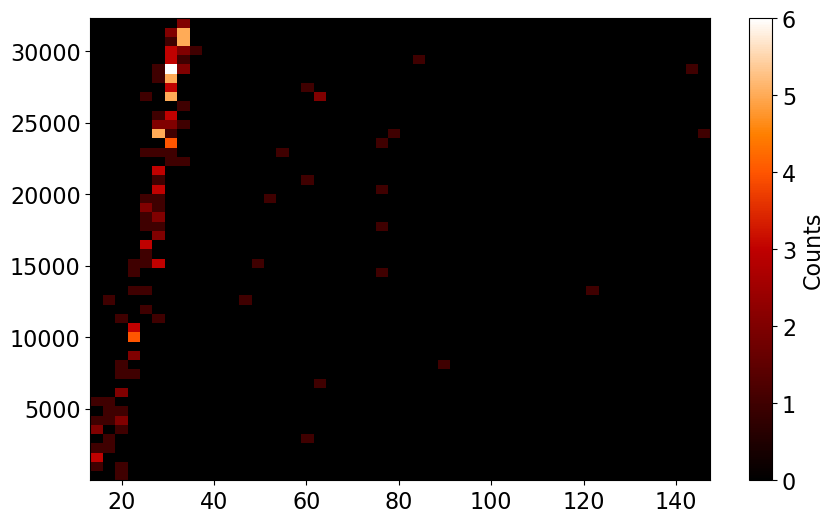

In [34]:
hist_output = plt.hist2d(df_daily['SolarPhotovoltaic']/1e3, df_daily['ThermalSolar'], bins=50, cmap='gist_heat') 
# try different color maps: viridis(default), inferno, gist_heat
#plt.hist2d(df_daily['SolarPhotovoltaic'], df_daily['ThermalSolar'], bins=[25, 50], range=[[-10, 14], [-5, 7]])

plt.colorbar(label='Counts');

*** 

### An insight into `matplotlib`:
Matplotlib is actually structured into multiple layers:
<table><tr>
<td><img src="https://raw.githubusercontent.com/MatSmithAstro/phys465_resources/main/workshops/week12/resources/artists_figure.png"></img></td>
<td><img src="https://raw.githubusercontent.com/MatSmithAstro/phys465_resources/main/workshops/week12/resources/artists_tree.png"></img></td>
</tr>
</table>

### Figure
The whole figure. The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. A figure can have any number of Axes.

### Axes
This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects.

The Axes class and it's member functions are the primary entry point to working with the OO interface.

### Axis
These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks).
***

### `matplotlib`: multiple plots in the same figure
This is a common requirement in physics, and there are multiple ways to do it

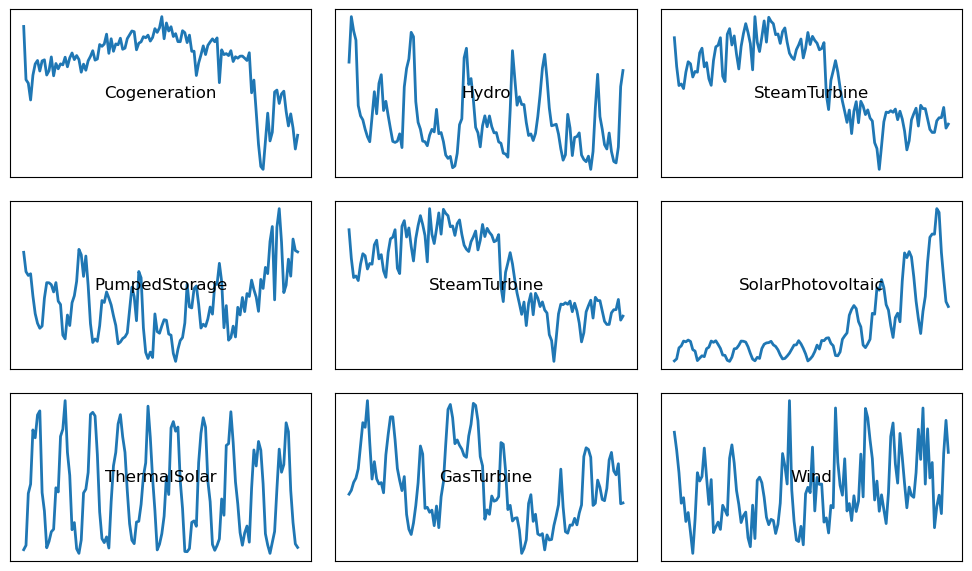

In [35]:
sources_sample = np.random.choice(renewable + non_renewable, 9)

# subplot arguments: # of rows, # of columns, plot index (row * (#cols) + col)
for i in range(9):
    ax = plt.subplot(3, 3, i + 1) # the same as fig.add_subplot
    x = df_monthly[sources_sample[i]]
    ax.plot(x)
    x_center = np.array(ax.get_xlim()).sum()/2
    y_center = np.array(ax.get_ylim()).sum()/2.
    ax.text(x_center, y_center, sources_sample[i], ha='center', va='center', fontsize=12)

    # Remove the ticks for cleaner plotting
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout() # When doing multiple plots you should almost always use this command

## `matplotlib`: subplots and shared axes

/var/folders/9b/5ty411ds1t52jwpfl_dvqbtm0000gn/T/ipykernel_34645/1583955516.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.exp(-x)*x**k / np.math.factorial(k)


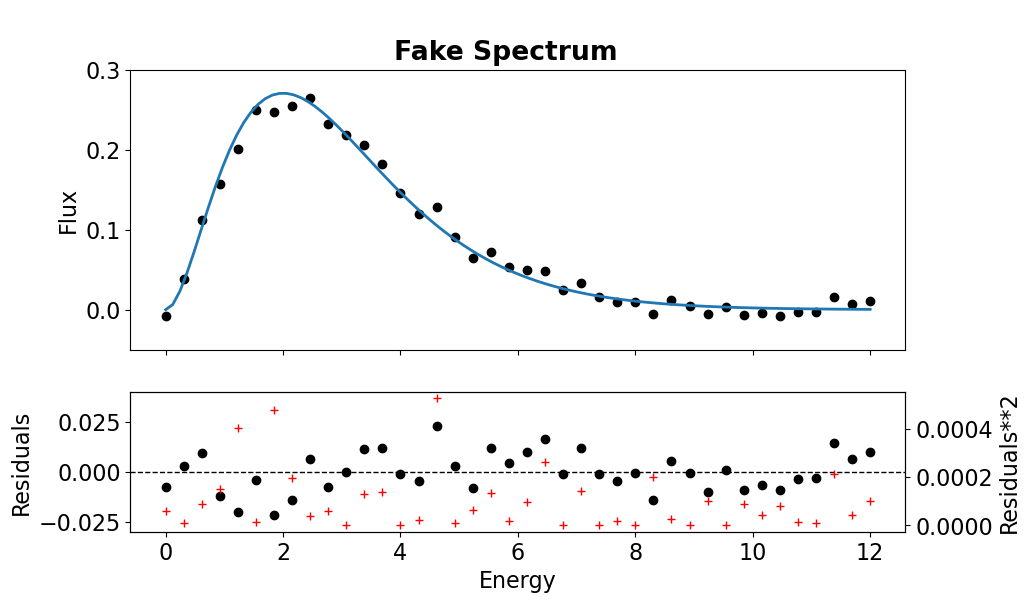

In [36]:
def poisson(x, k):
    return np.exp(-x)*x**k / np.math.factorial(k)

x = np.linspace(0, 12, 40)
y = poisson(x, 2)
y_noise = y + np.random.normal(0, 0.01, len(y))
z = np.linspace(0, 12, 100)

gridspec = {'height_ratios': [2, 1]}
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=gridspec)

ax1.plot(x, y_noise, 'ko')
ax1.plot(z, poisson(z, 2))
ax1.set_ylim(-0.05, 0.30)
ax1.set_ylabel('Flux')
#ax1.set_yticks(ax1.get_yticks()[1:])    # remove bottom y-tick

ax2.plot(x, y_noise - y, 'ko')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax2.set_xlabel('Energy')
ax2.set_ylim(-0.03, 0.04)
ax2.set_ylabel('Residuals')
#ax2.set_yticks(ax2.get_yticks()[:-2])   # remove top y-tick

ax3 = ax2.twinx()
ax3.plot(x, (y_noise - y)**2, '+', color='red')
ax3.set_ylabel('Residuals**2')
#fig.subplots_adjust(hspace=0)
fig.suptitle('\nFake Spectrum', fontweight='bold');

### `matplotlib`: gridspec objects

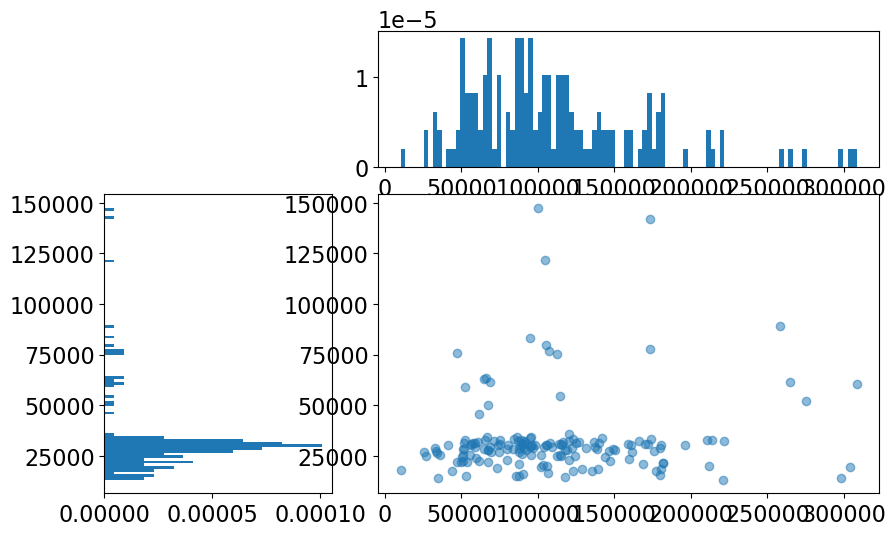

In [37]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

fig = plt.figure()
gspec = gridspec.GridSpec(3, 3) #, wspace=0.05, hspace=0.05)

top_histogram = fig.add_subplot(gspec[0, 1:])
side_histogram = fig.add_subplot(gspec[1:, 0])
lower_right = fig.add_subplot(gspec[1:, 1:])

# Data from daily energy generation
X = df_daily['Wind']
Y = df_daily['SolarPhotovoltaic']

# Normed histograms counts add up to 1, they resemble a probability density function
top_histogram.hist(X, bins=100, density=True)
side_histogram.hist(Y, bins=100, orientation='horizontal', density=True)
# flip the side histogram's x axis
#side_histogram.invert_xaxis()
lower_right.scatter(X, Y, alpha=0.5)

# Remove the picks in-between
#top_histogram.set_xticks([])
#lower_right.set_yticks([])
#top_histogram.set_yticks(top_histogram.get_yticks()[1:])
#side_histogram.set_xticks(side_histogram.get_xticks()[1:]);

### `matplotlib`: images and contours
 * 2D plotting in matplotlib requires a 2D grid
 * Image manipulation (e.g. fits) is also supported

In [38]:
from matplotlib.colors import LogNorm
x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 120).reshape(-1, 1)
z = np.sin(x) + np.cos(y)
print(z)

[[1.         1.05277535 1.1054036  ... 0.8945964  0.94722465 1.        ]
 [0.99860641 1.05138176 1.10401001 ... 0.89320281 0.94583106 0.99860641]
 [0.99442953 1.04720487 1.09983313 ... 0.88902593 0.94165418 0.99442953]
 ...
 [0.99442953 1.04720487 1.09983313 ... 0.88902593 0.94165418 0.99442953]
 [0.99860641 1.05138176 1.10401001 ... 0.89320281 0.94583106 0.99860641]
 [1.         1.05277535 1.1054036  ... 0.8945964  0.94722465 1.        ]]


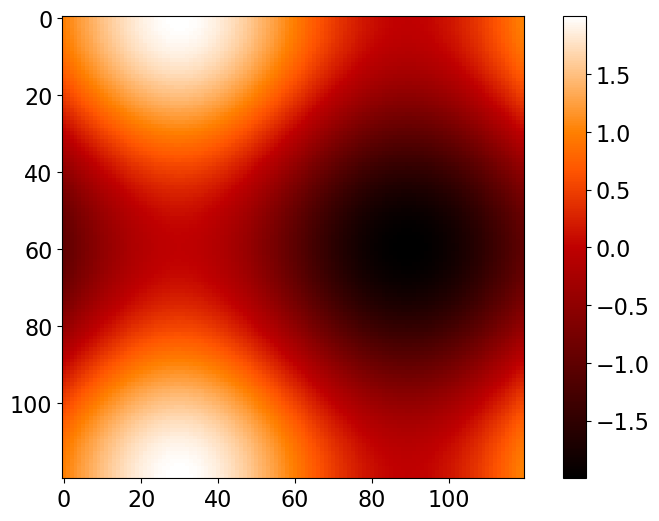

In [39]:
im = plt.imshow(z, cmap='gist_heat') #, clim=(-0.5, 0.5)) #, norm=LogNorm())
plt.colorbar();

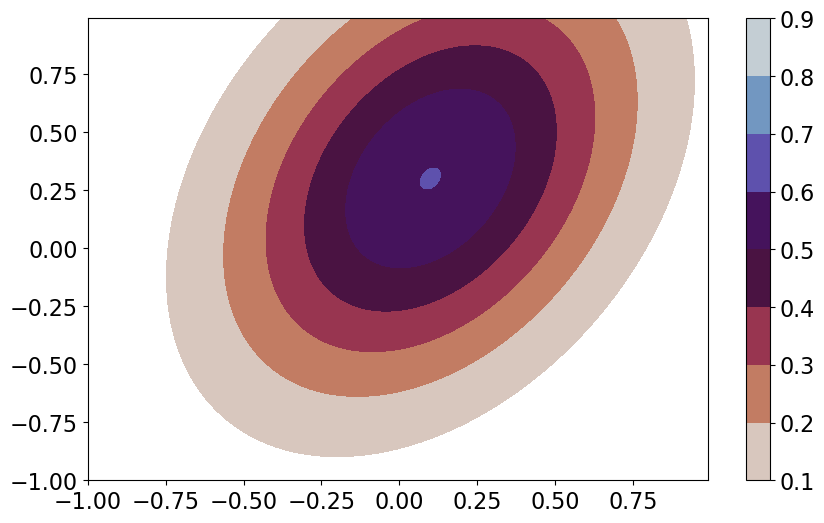

In [40]:
# Contours require (x,y,z)
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
z = stats.multivariate_normal([0.1, 0.3], [[0.2, 0.3], [0.1, 0.4]])
plt.contourf(x, y, z.pdf(pos), levels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], cmap='twilight_r')
plt.colorbar();

### `matplotlib`: saving figures
Use `plt.savefig` to save your figure.

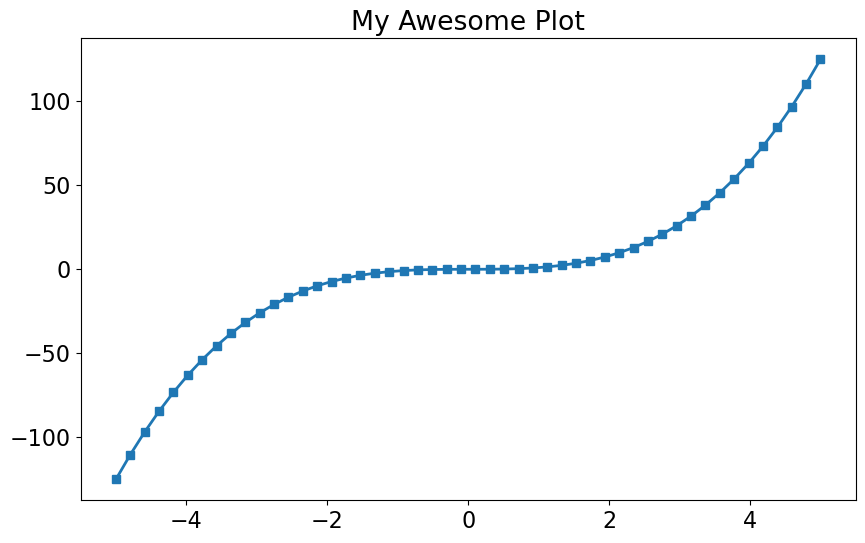

In [41]:
x = np.linspace(-5, 5)
plt.plot(x, x**3, marker='s')
plt.title("My Awesome Plot")

plot_folder = '/Users/matt/Desktop/'
# save in dedicated directory; extension determines file type
plt.savefig(plot_folder+'awesome_plot.pdf')
plt.savefig(plot_folder+'awesome_plot.eps')
plt.savefig(plot_folder+'awesome_plot.png', dpi=300)
plt.savefig(plot_folder+'awesome_plot.jpg', dpi=300)

# absolute path
# plt.savefig('/path/to/output/directory/awesome_plot.pdf')

## `matplotlib`: many, many, many more options exist: 
 * Other libraries:
    * `seaborn`, `plotly`, `bokeh`
 * Other techniques:
    * animations
    * interactive plots
    * 3D plots (points and surfaces)
    * pie-charts
    * sky projections
    * global projections
    * box plots
    * shapes
 * multiple styles

### For example:

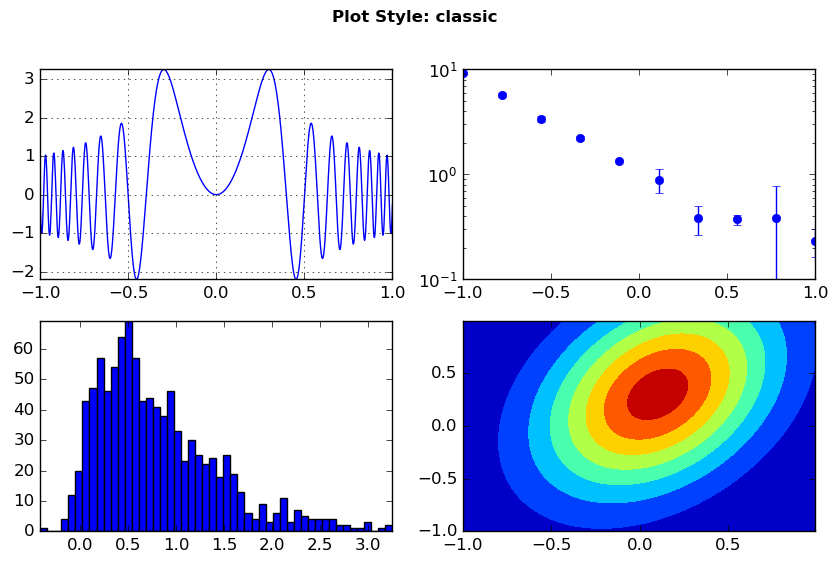

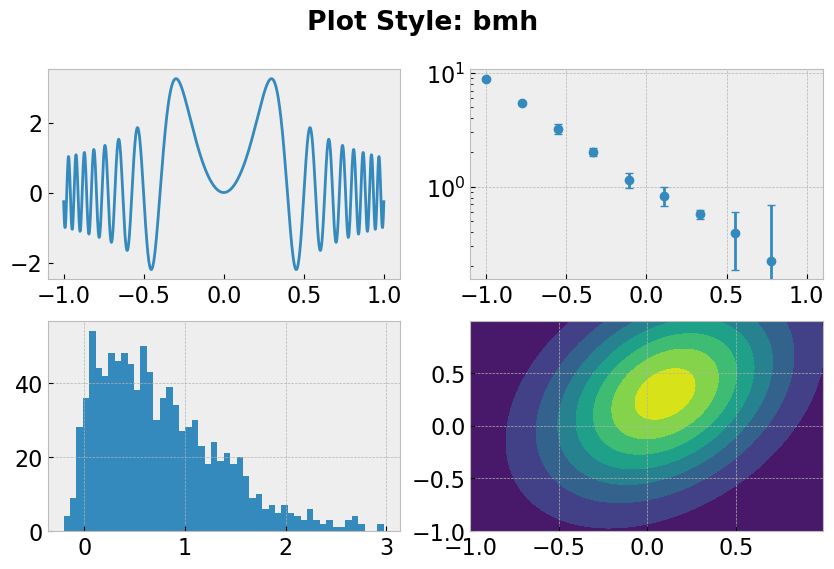

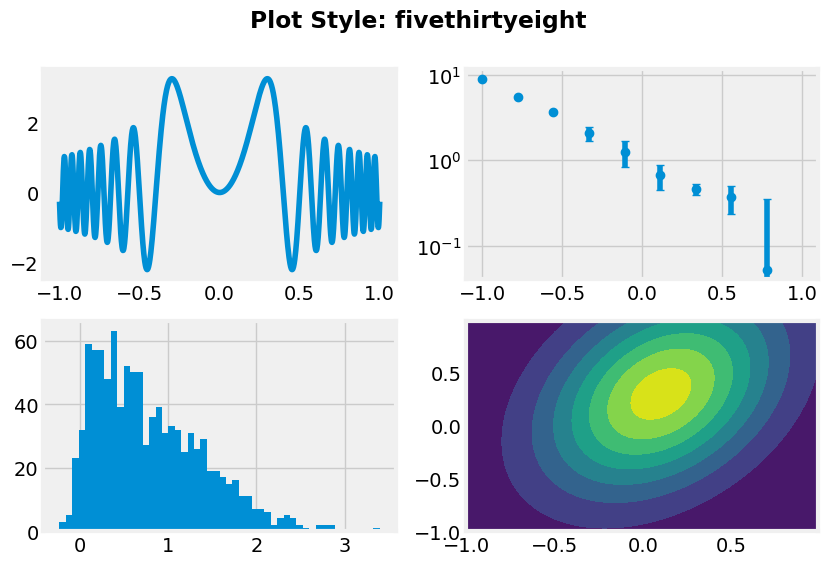

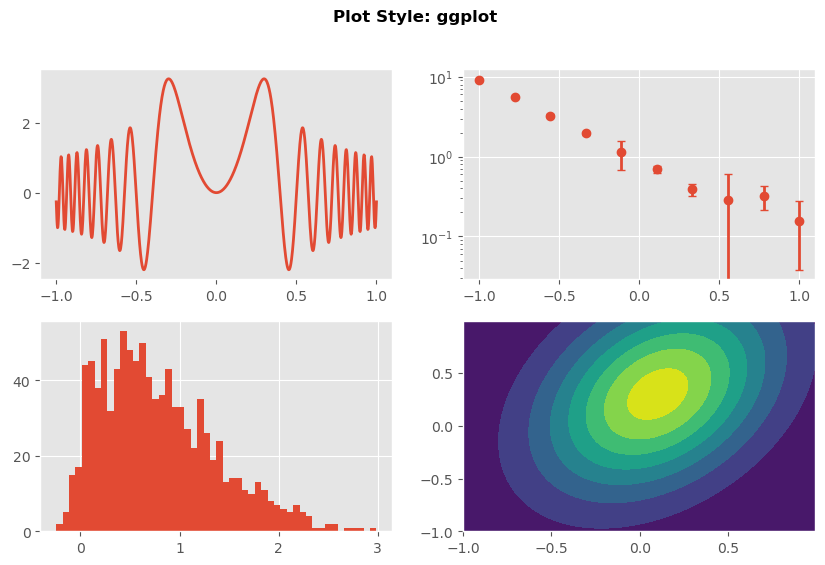

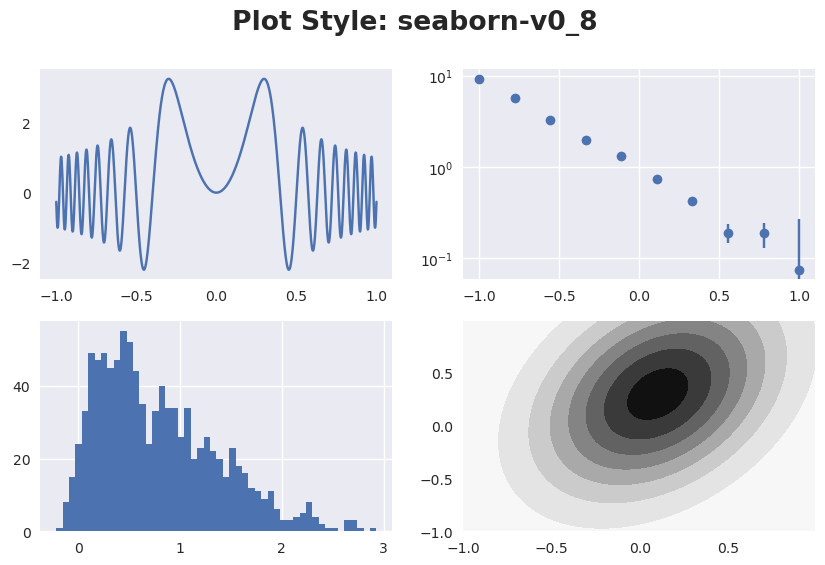

In [42]:
def plot_stuff():
    plt.subplot(2, 2, 1)
    x = np.linspace(-1, 1, 1000)
    plt.plot(x, np.sin(50*x**3)/(x))
    plt.grid()

    plt.subplot(2, 2, 2)
    x = np.linspace(-1, 1, 10)
    y = np.exp(-2.2*x) + np.random.normal(0, 0.1, 10)
    yerr = np.abs(np.random.normal(0, 0.2, 10))
    plt.errorbar(x, y, yerr, fmt='o', capsize=3)
    plt.yscale('log')

    plt.subplot(2, 2, 3)
    x = stats.skewnorm.rvs(10, size=1000)
    plt.hist(x, bins=50)

    plt.subplot(2, 2, 4)
    x, y = np.mgrid[-1:1:.01, -1:1:.01]
    pos = np.dstack((x, y))
    z = stats.multivariate_normal([0.1, 0.3], [[0.2, 0.3], [0.1, 0.4]])
    plt.contourf(x, y, z.pdf(pos))

for plot_style in ['classic', 'bmh', 'fivethirtyeight', 'ggplot', 'seaborn-v0_8']:
    plt.figure()
    with plt.style.context(plot_style):   # use context manager so that changes are temporary
        plot_stuff()
        plt.suptitle('Plot Style: ' + plot_style, fontweight='bold')

***